In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import cluster_utils as utl
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
# loading players
g1f = pd.read_csv('cluster_results/final_clusters/g1_f.csv')
g1d = pd.read_csv('cluster_results/final_clusters/g1_d.csv')

g2f = pd.read_csv('cluster_results/final_clusters/g2_f.csv')
g2d = pd.read_csv('cluster_results/final_clusters/g2_d.csv')

g3f = pd.read_csv('cluster_results/final_clusters/g3_f.csv')
g3d = pd.read_csv('cluster_results/final_clusters/g3_d.csv')

g4f = pd.read_csv('cluster_results/final_clusters/g4_f.csv')
g4d = pd.read_csv('cluster_results/final_clusters/g4_d.csv')

g5f = pd.read_csv('cluster_results/final_clusters/g5_f.csv')
g5d = pd.read_csv('cluster_results/final_clusters/g5_d.csv')

g6f = pd.read_csv('cluster_results/final_clusters/g6_f.csv')
g6d = pd.read_csv('cluster_results/final_clusters/g6_d.csv')

In [3]:
# loading goons
goon1 = pd.read_csv('data/goons/goon1.csv')
goon2 = pd.read_csv('data/goons/goon2.csv')
goon3 = pd.read_csv('data/goons/goon3.csv')
goon4 = pd.read_csv('data/goons/goon4.csv')
goon5 = pd.read_csv('data/goons/goon5.csv')
goon6 = pd.read_csv('data/goons/goon6.csv')

goon_list1 = goon1['Player'].unique()
goon_list2 = goon2['Player'].unique()
goon_list3 = goon3['Player'].unique()
goon_list4 = goon4['Player'].unique()
goon_list5 = goon5['Player'].unique()
goon_list6 = goon6['Player'].unique()

In [4]:
# adding goon indicator to final dfs
df_list = [g1f, g1d, g2f, g2d, g3f, g3d, g4f, g4d, g5f, g5d, g6f, g6d]

for df in df_list:
    df['goon'] = 0

g1f.loc[g1f.Player.isin(goon_list1), "goon"] = int(1)
g1d.loc[g1d.Player.isin(goon_list1), "goon"] = int(1)

g2f.loc[g2f.Player.isin(goon_list2), "goon"] = int(1)
g2d.loc[g2d.Player.isin(goon_list2), "goon"] = int(1)

g3f.loc[g3f.Player.isin(goon_list3), "goon"] = int(1)
g3d.loc[g3d.Player.isin(goon_list3), "goon"] = int(1)

g4f.loc[g4f.Player.isin(goon_list4), "goon"] = int(1)
g4d.loc[g4d.Player.isin(goon_list4), "goon"] = int(1)

g5f.loc[g5f.Player.isin(goon_list5), "goon"] = int(1)
g5d.loc[g5d.Player.isin(goon_list5), "goon"] = int(1)

g6f.loc[g6f.Player.isin(goon_list6), "goon"] = int(1)
g6d.loc[g6d.Player.isin(goon_list6), "goon"] = int(1)


### Analysis

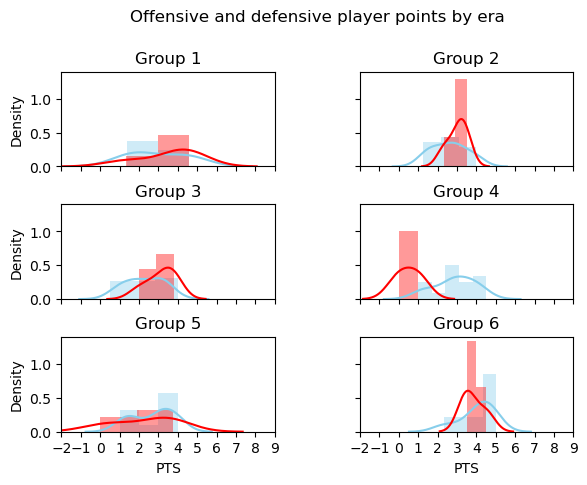

In [43]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)

# row1
sns.distplot( g1f.loc[g1f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[0,0])
sns.distplot( g1d.loc[g1d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[0,0])

sns.distplot( g2f.loc[g2f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[0,1])
sns.distplot( g2d.loc[g2d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[0,1])

# row2
sns.distplot( g3f.loc[g3f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[1,0])
sns.distplot( g3d.loc[g3d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[1,0])

sns.distplot( g4f.loc[g4f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[1,1])
sns.distplot( g4d.loc[g4d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[1,1])

#r ow 3
sns.distplot( g5f.loc[g5f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[2,0])
sns.distplot( g5d.loc[g5d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[2,0])

sns.distplot( g6f.loc[g6f['goon'] == 1]['PTS'] , color="skyblue", label="Ok", ax=ax[2,1])
sns.distplot( g6d.loc[g6d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[2,1])

# setting plot lims
ax[0,0].set_xlim([-2,9])
ax[0,0].set_xticks(range(-2,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

# setting titles
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')

ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

ax[2,0].set_title('Group 5')
ax[2,1].set_title('Group 6')

plt.suptitle('Offensive and defensive player points by era')
# plt.title('Defensive players in red')


plt.show()

Text(0.5, 1.0, 'Number of goons by era')

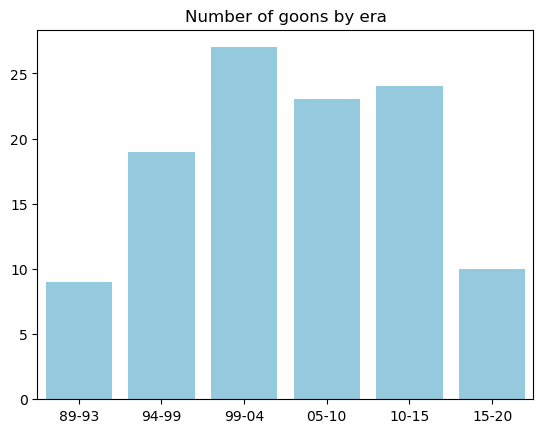

In [49]:
goon_bar = {'89-93': len(goon_list1),
            '94-99': len(goon_list2),
            '99-04': len(goon_list3),
            '05-10': len(goon_list4),
            '10-15': len(goon_list5),
            '15-20': len(goon_list6),
}

sns.barplot(x=list(goon_bar.keys()), y=list(goon_bar.values()), color='skyblue')

plt.title('Number of goons by era')